In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.widgets import Button
import matplotlib.patches as mpatches

In [3]:
csv_filename = "GLB.Ts_dSST.csv"
df = pd.read_csv(csv_filename, skiprows=1)

In [4]:
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.29,-0.18,-0.11,-0.19,-0.11,-0.23,-0.21,-0.09,-0.16,-0.23,-0.20,-0.23,-0.19,***,***,-0.14,-0.18,-0.20
1,1881,-0.15,-0.17,0.04,0.04,0.02,-0.20,-0.06,-0.02,-0.13,-0.20,-0.21,-0.10,-0.10,-.11,-.18,0.03,-0.09,-0.18
2,1882,0.15,0.15,0.04,-0.18,-0.16,-0.26,-0.20,-0.05,-0.10,-0.24,-0.16,-0.24,-0.10,-.09,.06,-0.10,-0.17,-0.17
3,1883,-0.31,-0.39,-0.13,-0.17,-0.20,-0.12,-0.08,-0.15,-0.20,-0.14,-0.22,-0.16,-0.19,-.20,-.31,-0.16,-0.12,-0.19
4,1884,-0.15,-0.08,-0.37,-0.42,-0.36,-0.40,-0.34,-0.26,-0.27,-0.24,-0.30,-0.28,-0.29,-.28,-.13,-0.39,-0.34,-0.27


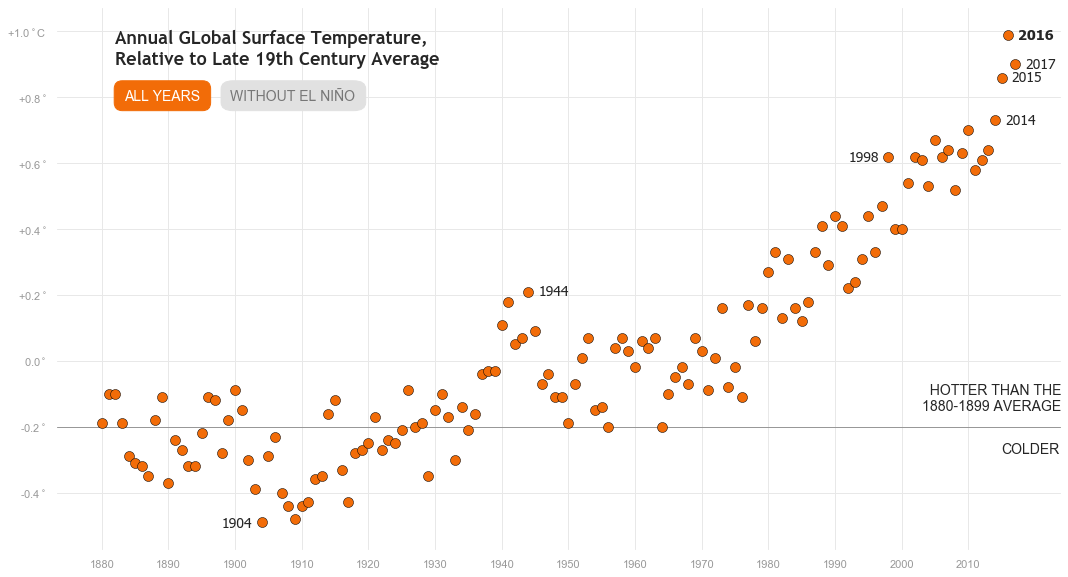

In [9]:
# add general style parameters
sns.set(rc={'figure.figsize':(18,10)})
sns.set_style({'axes.facecolor':'white',
               'grid.color': '#e8e8e8',
               'xtick.color':'#999999','ytick.color':'#999999'
              })
# J-D is average per year
ax = sns.scatterplot(x=df["Year"],
                y=df["J-D"],
                color='#f26c08',
                edgecolor='black',
                linewidth=0.5,
                s=100
               )

# add title
plt.text(1882, 0.9, "Annual GLobal Surface Temperature,\nRelative to Late 19th Century Average",
         fontfamily="Trebuchet MS", 
         fontsize=18, weight="bold")

# set axis labels and ticks
ax.set(xlabel=None, ylabel=None)
ylabels = list(map(lambda x: "+"+'{:,.1f}'.format(x)+"$^\circ$" if x > 0 else '{:,.1f}'.format(x)+"$^\circ$", ax.get_yticks()))
ylabels[-2] += "C"
ax.set_yticklabels(ylabels)
ax.set_xticks(range(1880, 2020, 10))

# make reference line bold
ind = ylabels.index('-0.2$^\\circ$')
gridlines = ax.yaxis.get_gridlines()
gridlines[ind].set_color("#989898")

# add labels for selected points
l_point_years = [1904, 1998]
r_point_years = [1944, 2014, 2015, 2017]
for year in l_point_years:
    x = year
    y = df.loc[df['Year'] == year]["J-D"]
    plt.text(x-6, y-0.015, str(year), fontfamily="Tahoma", fontsize=14)
for year in r_point_years:
    x = year
    y = df.loc[df['Year'] == year]["J-D"]
    plt.text(x+1.5, y-0.013, str(year), fontfamily="Tahoma", fontsize=14)
plt.text(2016+1.5, df.loc[df['Year'] == 2016]["J-D"]-0.013, "2016", weight='bold', fontfamily="Tahoma", fontsize=14)

# add labels for reference line (1880-1899 average)
plt.text(2003, -0.15, "  HOTTER THAN THE\n1880-1899 AVERAGE", fontfamily="Arial", fontsize=14)
plt.text(2015, -0.28, "COLDER", fontfamily="Arial", fontsize=14)

# add buttons
ax1 = ax.inset_axes([0.065, 0.81, 0.08, 0.05])
ax1.set_frame_on(False)
ball = Button(ax1, 'ALL YEARS', color = '#f26c08')
ball.label.set_fontsize(14)
ball.label.set_color('white')
fancybox1 = mpatches.FancyBboxPatch((0.01, 0.275), 1, 0.5, 
                                   edgecolor="#f26c08",
                                   facecolor="#f26c08",
                                   boxstyle="round,pad=0.1", 
                                   mutation_aspect=3, clip_on=False)
ax1.add_patch(fancybox1)

ax2 = ax.inset_axes([0.175, 0.81, 0.12, 0.05])
ax2.set_frame_on(False)
bnino = Button(ax2, 'WITHOUT EL NIÑO', color = '#e1e1e1')
bnino.label.set_fontsize(14)
bnino.label.set_color('#777777')
fancybox2 = mpatches.FancyBboxPatch((0.01, 0.275), 1, 0.5, 
                                   edgecolor="#e1e1e1",
                                   facecolor="#e1e1e1",
                                   boxstyle="round,pad=0.1", 
                                   mutation_aspect=3, clip_on=False)
ax2.add_patch(fancybox2)

plt.show()